In [101]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 
pd.set_option('display.max_columns', None)

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

# Feature engineering
from sklearn.preprocessing import PolynomialFeatures

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
train = pd.read_csv("Dataset/train.csv")
test = pd.read_csv("Dataset/test.csv")
train = train.drop("Unnamed: 0", axis=1)
test = test.drop("id", axis=1)

In [103]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df, info=True):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        if info:
            # Print some summary information
            print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
                "There are " + str(mis_val_table_ren_columns.shape[0]) +
                " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [104]:
def apply_operations_to_columns(df1, df2, columns):
    new_df1_addition = df1[columns].copy()
    new_df2_addition = df2[columns].copy()

    new_df1_subtraction = df1[columns].copy()
    new_df2_subtraction = df2[columns].copy()

    new_df1_division = df1[columns].copy()
    new_df2_division = df2[columns].copy()


    for col1 in columns:
        for col2 in columns:
            if col1 != col2:
                new_col1 = f"{col1}_plus_{col2}"
                new_col2 = f"{col1}_plus_{col2}"
                new_df1_addition[new_col1] = df1[col1] + df1[col2]
                new_df2_addition[new_col2] = df2[col1] + df2[col2]
    
    new_df1_addition["damage_grade"] = df1["damage_grade"]
    new_df1_addition_corr = new_df1_addition.corr()["damage_grade"].sort_values()


    for col1 in columns:
        for col2 in columns:
            if col1 != col2:
                new_col1 = f"{col1}_minus_{col2}"
                new_col2 = f"{col1}_minus_{col2}"
                new_df1_subtraction[new_col1] = df1[col1] - df1[col2]
                new_df2_subtraction[new_col2] = df2[col1] - df2[col2]
    
    new_df1_subtraction["damage_grade"] = df1["damage_grade"]
    new_df1_subtraction_corr = new_df1_subtraction.corr()["damage_grade"].sort_values()


    for col1 in columns:
        for col2 in columns:
            if col1 != col2:
                new_col1 = f"{col1}_divided_by_{col2}"
                new_col2 = f"{col1}_divided_by_{col2}"
                new_df1_division[new_col1] = df1[col1] / df1[col2]
                new_df2_division[new_col2] = df2[col1] / df2[col2]

    new_df1_division["damage_grade"] = df1["damage_grade"]
    new_df1_division_corr = new_df1_division.corr()["damage_grade"].sort_values()

    correlations = pd.concat([new_df1_addition_corr.to_frame(), new_df1_subtraction_corr.to_frame(), new_df1_division_corr.to_frame()])
    corr_filtered = pd.concat([correlations.head(20), correlations.tail(20)])


    return corr_filtered


In [105]:
def polynomial_feature(df1, columns, target, degree):
    # Make a new dataframe for polynomial features
    poly_features = df1[columns]

    # Create the polynomial object with specified degree
    poly_transformer = PolynomialFeatures(degree=degree)

    # Train the polynomial features
    poly_features = poly_transformer.fit_transform(poly_features)
    
    # Create a dataframe of the features
    poly_features = pd.DataFrame(poly_features, columns=poly_transformer.get_feature_names_out(columns))

    # Add in the target
    poly_features[target] = df1[target]

    print("Poly features shape is", poly_features.shape)

    # Find the correlations with the target
    poly_corrs = poly_features.corr()[target].sort_values().to_frame()
    corr = pd.concat([poly_corrs.head(20), poly_corrs.tail(20)])

    return corr

In [106]:
missing_values_table(train)

Your selected dataframe has 24 columns.
There are 22 columns that have missing values.


,Missing Values,% of Total Values
technical_solution_proposed,676014,93.5
type_of_roof,421208,58.3
plinth_area (ft^2),421208,58.3
type_of_ground_floor,332806,46.0
floors_before_eq (total),332806,46.0
height_before_eq (ft),332806,46.0
position,312006,43.2
type_of_other_floor,301606,41.7
building_plan_configuration,301606,41.7
land_surface_condition,301606,41.7


In [107]:
missing_values_table(test)

Your selected dataframe has 23 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [108]:
mapping = {
    'floor two': 2,
    'Floor 3': 3,
    'Two Floor': 2,
    'two': 2,
    ' just 2 floor': 2,
    'There is 2 Floor/Story': 2,
    '1st Story': 1,
    'Floor 2': 2,
    'fifth': 5,
    'Three floor': 3,
    'floor one': 1,
    '2': 2,
    'Has 1 floor': 1,
    'one story': 1,
    'two story': 2,
    'floor second': 2,
    'floor third': 3,
    '3.00': 3,
    '1': 1,
    ' has 3 Floor': 3,
    '2 floor': 2,
    'three Story': 3,
    'Floor 1': 1,
    'floor 1st': 1,
    'one': 1,
    'Just 1 floor': 1,
    'Floor-three': 3,
    'Three': 3,
    'four Floor': 4,
    ' has Four fl': 4,
    'Fl four': 4,
    'Fl Five': 5,
    '6': 6,
    '5': 5,
    '4': 4,
    'Floor 4': 4,
    'floor four': 4,
    'Four Story': 4,
    'Four': 4,
    'Floor Fifth': 5,
    'five Floor': 5,
    ' Has Five fl': 5,
    '8': 8,
    '9': 9,
    '7': 7,
    'Has Five fl': 5,
}

# Apply the mapping to convert text values to numerical values
train["floors_before_eq (total)"] = train["floors_before_eq (total)"].map(mapping)
test["floors_before_eq (total)"] = test["floors_before_eq (total)"].map(mapping)

In [109]:
train["plinth_area (ft^2)"] = train["plinth_area (ft^2)"].replace('More than 1000 ft^2', 1005)
test["plinth_area (ft^2)"] = test["plinth_area (ft^2)"].replace('More than 1000 ft^2', 1005)


train["plinth_area (ft^2)"] = train["plinth_area (ft^2)"].str.replace(' ft^2', '', regex=False).astype(float).astype('Int64')
test["plinth_area (ft^2)"] = test["plinth_area (ft^2)"].str.replace(' ft^2', '', regex=False).astype(float).astype('Int64')

In [110]:
train["no_family_residing"] = train["no_family_residing"].replace('None', 0).astype('Float32')
test["no_family_residing"] = test["no_family_residing"].replace('None', 0).astype('Float32')

In [111]:
train["type_of_reinforcement_concrete"] = train["type_of_reinforcement_concrete"].astype('Int16')
test["type_of_reinforcement_concrete"] = test["type_of_reinforcement_concrete"].astype('Int16')

train["wall_binding"] = train["wall_binding"].astype('Int16')
test["wall_binding"] = test["wall_binding"].astype('Int16')

train["wall_material"] = train["wall_material"].astype('Int16')
test["wall_material"] = test["wall_material"].astype('Int16')

In [112]:
# Gets the categorical and numerical columns
categorical = [c for c in train.columns 
               if train.dtypes[c] == 'object']

numerical = [c for c in train.columns 
             if train.dtypes[c] != 'object']

# Correct these columns
numerical.remove("wall_binding")
numerical.remove("wall_material")
numerical.remove("type_of_reinforcement_concrete")
numerical.remove("has_secondary_use")

categorical.append("wall_binding")
categorical.append("wall_material")
categorical.append("type_of_reinforcement_concrete")
categorical.append("has_secondary_use")

In [113]:
train[numerical].head()

,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),no_family_residing,damage_grade
0,2.0,1.0,256,22.0,1.0,1.0
1,3.0,3.0,985,18.0,1.0,5.0
2,2.0,7.0,<NA>,14.0,1.0,5.0
3,2.0,18.0,185,15.0,1.0,4.0
4,2.0,22.0,290,17.0,1.0,1.0


In [114]:
train['technical_solution_proposed'].value_counts()/len(train)

Reconstruction    0.039909
Major repair      0.011017
Minor repair      0.009480
No need           0.004343
Name: technical_solution_proposed, dtype: float64

In [115]:
for col in categorical:
    print(col)
    print(train[col].value_counts()/len(train))
    print()

land_surface_condition
Flat              0.482969
Moderate slope    0.080523
Steep slope       0.019243
Name: land_surface_condition, dtype: float64

type_of_foundation
Clay Sand Mixed mortar-Stone/Brick    0.276580
Clay mortar-Stone/Brick               0.219514
Mud mortar-Stone/Brick                0.055919
Cement-Stone or Cement-Brick          0.027224
Bamboo/TImber                         0.022800
Bamboo or Timber                      0.020377
RC                                    0.019239
Reinforced Concrete                   0.008935
Bamboo/Timber                         0.007420
Cement-Stone/Brick                    0.007075
Other                                 0.002298
Others                                0.001686
Name: type_of_foundation, dtype: float64

type_of_roof
Bamboo/Timber Light roof                0.110180
Wood Light Roof or Bamboo Heavy Roof    0.096975
Wood Light Roof or Bamboo Light Roof    0.082843
Bamboo/TImber-Light Roof                0.055451
Bamboo or Timber

In [116]:
grouped_values = {
    'Bamboo/Timber Light roof': ['Bamboo/Timber Light roof', 'Bamboo or Timber Light roof', 'Bamboo/TImber-Light Roof'],
    'Wood Light Roof or Bamboo Heavy Roof': ['Wood Light Roof or Bamboo Heavy Roof'],
    np.nan: [np.nan],
    'Wood Light Roof or Bamboo Light Roof': ['Wood Light Roof or Bamboo Light Roof'],
    'Reinforced Brick Slab/rcc/rbc': ['Reinforced Brick Slab/rcc/rbc', 'Reinforced brick concrete/rcc/rbc'],
    'Bamboo/Timber Heavy roof': ['Bamboo/Timber Heavy roof', 'Bamboo or Timber Heavy roof', 'Bamboo/TImber-Heavy Roof'],
    'Reinforced cement concrete/rb/rbc': ['Reinforced cement concrete/rb/rbc', 'rcc/rb/rbc, reinforced cement concrete/rb/rbc']
}

train['type_of_roof'] = train['type_of_roof'].replace({value: group for group, values in grouped_values.items() for value in values})
test['type_of_roof'] = test['type_of_roof'].replace({value: group for group, values in grouped_values.items() for value in values})

In [117]:
grouped_values = {
    'Bamboo or Timber': ['Bamboo or Timber', 'Bamboo/TImber', 'Bamboo/Timber'],
    'Clay Sand Mixed mortar-Stone/Brick': ['Clay Sand Mixed mortar-Stone/Brick'],
    'Mud mortar-Stone/Brick': ['Mud mortar-Stone/Brick'],
    np.nan: [np.nan],
    'Clay mortar-Stone/Brick': ['Clay mortar-Stone/Brick'],
    'Reinforced Concrete': ['Reinforced Concrete', 'RC'],
    'Cement-Stone or Cement-Brick': ['Cement-Stone or Cement-Brick', 'Cement-Stone/Brick'],
    'Others': ['Others', 'Other']
}

train['type_of_foundation'] = train['type_of_foundation'].replace({value: group for group, values in grouped_values.items() for value in values})
test['type_of_foundation'] = test['type_of_foundation'].replace({value: group for group, values in grouped_values.items() for value in values})

In [118]:
grouped_values = {
    'Clay': ['Clay'],
    np.nan : [np.nan],
    'Mud': ['Mud', 'mud'],
    'Brick or Stone': ['Brick or Stone', 'brick/stone', 'Brick/Stone'],
    'Reinforced Concrete': ['Reinforced Concrete', 'reinforced concrete', 'RC'],
    'soil, water, loam Mixed': ['soil, water, loam Mixed'],
    'Other': ['Other'],
    'Lumber': ['Lumber', 'Timber', 'TImber', 'Timber', 'Wood']
}

train['type_of_ground_floor'] = train['type_of_ground_floor'].replace({value: group for group, values in grouped_values.items() for value in values})
test['type_of_ground_floor'] = test['type_of_ground_floor'].replace({value: group for group, values in grouped_values.items() for value in values})

In [119]:
grouped_values = {
    'Timber/Bamboo-Mud': ['TImber/Bamboo-Mud', 'Wood-Mud or Bamboo Mud', 'Timber Mud or Bamboo-Mud', 'Wood or Bamboo Mud'],
    np.nan: [np.nan],
    'Not applicable': ['Not applicable'],
    'rcc/rb/rbc': ['rcc/rb/rbc', 'Reinforced brick concrete/rcc/rbc', 'reinforced cement concrete/rb/rbc'],
    'Wood-Plank': ['Wood-Plank', 'Timber-Planck', 'Lumber-plank']
}

train['type_of_other_floor'] = train['type_of_other_floor'].replace({value: group for group, values in grouped_values.items() for value in values})
test['type_of_other_floor'] = test['type_of_other_floor'].replace({value: group for group, values in grouped_values.items() for value in values})

In [120]:
grouped_values = {
    'Private Use': ['Private Use', 'Private', 'Prvt', 'Privste'],
    np.nan: [np.nan],
    'Public Space': ['Public Space'],
    'Public Use': ['Public Use', 'Public'],
    'Unknown': ['Unknown'],
    'Institutionals': ['Institutionals', 'Institutional Use', 'Institutional'],
    'Other': ['Other', 'Unspecified']
}

train['legal_ownership_status'] = train['legal_ownership_status'].replace({value: group for group, values in grouped_values.items() for value in values})
test['legal_ownership_status'] = test['legal_ownership_status'].replace({value: group for group, values in grouped_values.items() for value in values})

In [121]:
grouped_values = {
    'Non-residential': ['Non-residential'],
    np.nan: [np.nan],
    'Hotel/Motel': ['Hotel/Motel'],
    'Rental Residential': ['Rental Residential'],
    'Housing': ['Housing'],
    'Other': ['Other', 'Other Residential Type']
}

train['residential_type'] = train['residential_type'].replace({value: group for group, values in grouped_values.items() for value in values})
test['residential_type'] = test['residential_type'].replace({value: group for group, values in grouped_values.items() for value in values})

In [122]:
grouped_values = {
    'Non-public': ['Non-public'],
    'Religious Sites': ['Religious Sites'],
    'Other Institutional Building': ['Other Institutional Building'],
    'Drugstore': ['Drugstore'],
    'Health Clinics': ['Health Clinics', 'Hospital'],
    'Shopping Sites': ['Shopping Sites'],
    'High School': ['High School'],
    'University': ['University'],
    'Middle School': ['Middle School'],
    'Primary School': ['Primary School'],
    'Recreational Park': ['Recreational Park'],
    'Museum': ['Museum']
}

train['public_place_type'] = train['public_place_type'].replace({value: group for group, values in grouped_values.items() for value in values})
test['public_place_type'] = test['public_place_type'].replace({value: group for group, values in grouped_values.items() for value in values})

In [123]:
grouped_values = {
    'Non-industrial': ['Non-industrial'],
    np.nan: [np.nan],
    'Metallurgy': ['Metallurgy'],
    'Service/Tourism': ['Service/Tourism'],
    'Food': ['Food'],
    'Manufacturing': ['Manufacturing'],
    'Infrastructure': ['Infrastructure'],
    'Agro': ['Agro', 'Farm'],
    'Forest-based': ['Forest-based']
}

train['industrial_use_type'] = train['industrial_use_type'].replace({value: group for group, values in grouped_values.items() for value in values})
test['industrial_use_type'] = test['industrial_use_type'].replace({value: group for group, values in grouped_values.items() for value in values})

In [124]:
grouped_values = {
    'Govermental Buildings' : ['Police Offices']
}

train['govermental_use_type'] = train['govermental_use_type'].replace({value: group for group, values in grouped_values.items() for value in values})
test['govermental_use_type'] = test['govermental_use_type'].replace({value: group for group, values in grouped_values.items() for value in values})

In [125]:
train["no_family_residing"] = train["no_family_residing"].fillna(1)
train["residential_type"] = train["residential_type"].fillna("Non-residential")
train["industrial_use_type"] = train["industrial_use_type"].fillna("Non-Non-industrial")

In [126]:
train = train[train["technical_solution_proposed"].notna()]

In [127]:
train["height_per_floor"] = train["height_before_eq (ft)"] / train["floors_before_eq (total)"]
test["height_per_floor"] = test["height_before_eq (ft)"] / test["floors_before_eq (total)"]

train["floors_before_eq (total)_divided_by_plinth_area (ft^2)"] = train["floors_before_eq (total)"] / train["plinth_area (ft^2)"]
test["floors_before_eq (total)_divided_by_plinth_area (ft^2)"] = test["floors_before_eq (total)"] / test["plinth_area (ft^2)"]

train["family_per_floor"] = train["no_family_residing"] /  train["floors_before_eq (total)"]
test["family_per_floor"] = test["no_family_residing"] /  test["floors_before_eq (total)"]

train["old_building_divided_by_plinth_area (ft^2)"] = train["old_building"] / train["plinth_area (ft^2)"]
test["old_building_divided_by_plinth_area (ft^2)"] = test["old_building"] / test["plinth_area (ft^2)"]

In [128]:
corr = train.corr()
corr["damage_grade"].sort_values()

type_of_reinforcement_concrete                           -0.299456
height_per_floor                                         -0.154201
plinth_area (ft^2)                                       -0.131248
family_per_floor                                         -0.120673
has_secondary_use                                        -0.091324
no_family_residing                                        0.046817
old_building                                              0.055898
height_before_eq (ft)                                     0.061135
old_building_divided_by_plinth_area (ft^2)                0.061212
floors_before_eq (total)_divided_by_plinth_area (ft^2)    0.196645
floors_before_eq (total)                                  0.199355
wall_material                                             0.445075
wall_binding                                              0.449624
damage_grade                                              1.000000
Name: damage_grade, dtype: float64

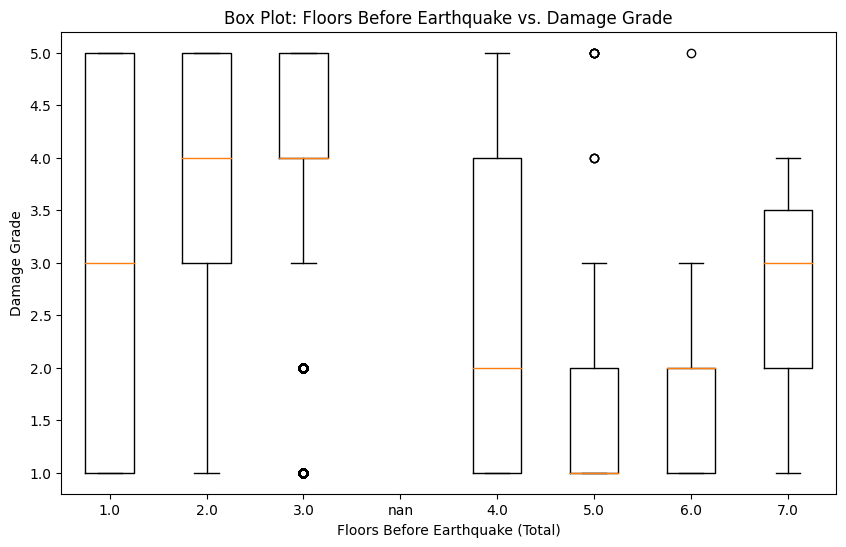

In [129]:
plt.figure(figsize=(10, 6))
plt.boxplot([train[train["floors_before_eq (total)"] == i]["damage_grade"] for i in sorted(train["floors_before_eq (total)"].unique())],
            labels=sorted(train["floors_before_eq (total)"].unique()))
plt.xlabel("Floors Before Earthquake (Total)")
plt.ylabel("Damage Grade")
plt.title("Box Plot: Floors Before Earthquake vs. Damage Grade")

# Show the plot
plt.show()

In [130]:
def plot_kde_and_log_transform(train, test, column, xlabel, title):
    plt.figure(figsize=(10, 6))

    # Plot before Log Transformation
    plt.subplot(2, 1, 1)
    sns.kdeplot(data=train[train['damage_grade'] == 1], x=column, label='damage_grade == 1')
    sns.kdeplot(data=train[train['damage_grade'] == 2], x=column, label='damage_grade == 2')
    sns.kdeplot(data=train[train['damage_grade'] == 3], x=column, label='damage_grade == 3')
    sns.kdeplot(data=train[train['damage_grade'] == 4], x=column, label='damage_grade == 4')
    sns.kdeplot(data=train[train['damage_grade'] == 5], x=column, label='damage_grade == 5')

    plt.xlabel(xlabel)
    plt.ylabel('Density')
    plt.title(f'Distribution of {title} by Damage Grade (Before Log Transformation)')
    plt.legend()

    # Apply Log Transformation to train and test data
    train[column] = np.log(train[column])
    test[column] = np.log(test[column])

    # Plot after Log Transformation
    plt.subplot(2, 1, 2)
    sns.kdeplot(data=train[train['damage_grade'] == 1], x=column, label='damage_grade == 1')
    sns.kdeplot(data=train[train['damage_grade'] == 2], x=column, label='damage_grade == 2')
    sns.kdeplot(data=train[train['damage_grade'] == 3], x=column, label='damage_grade == 3')
    sns.kdeplot(data=train[train['damage_grade'] == 4], x=column, label='damage_grade == 4')
    sns.kdeplot(data=train[train['damage_grade'] == 5], x=column, label='damage_grade == 5')

    plt.xlabel(f'{xlabel} (Log Transformed)')
    plt.ylabel('Density')
    plt.title(f'Distribution of {title} by Damage Grade (After Log Transformation)')
    plt.legend()

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()

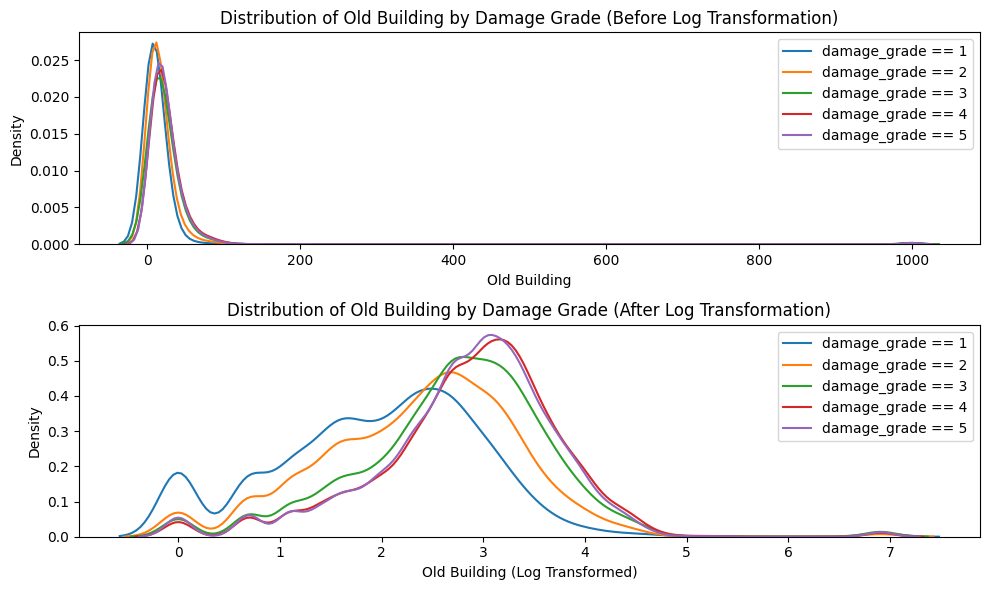

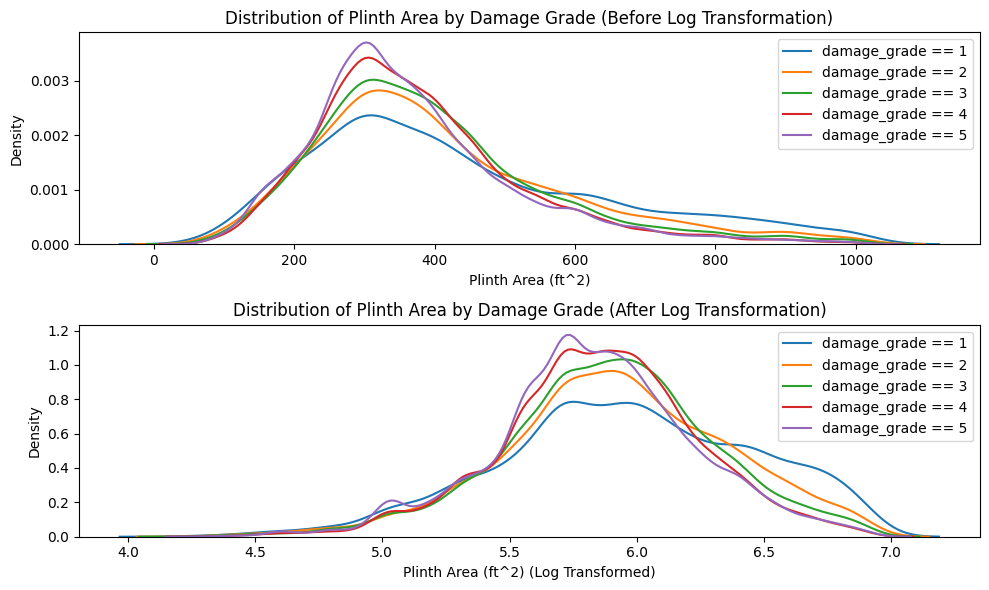

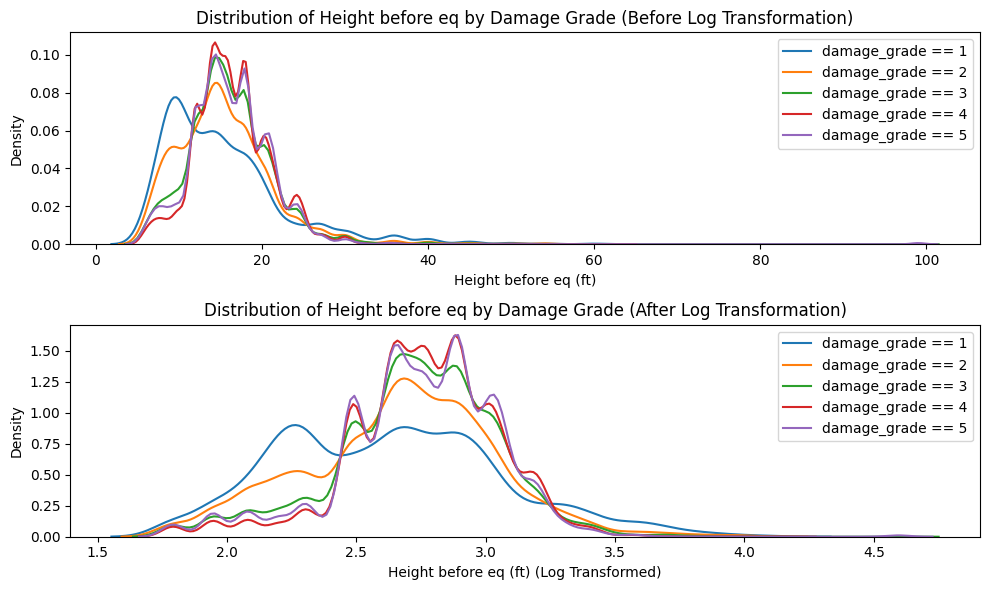

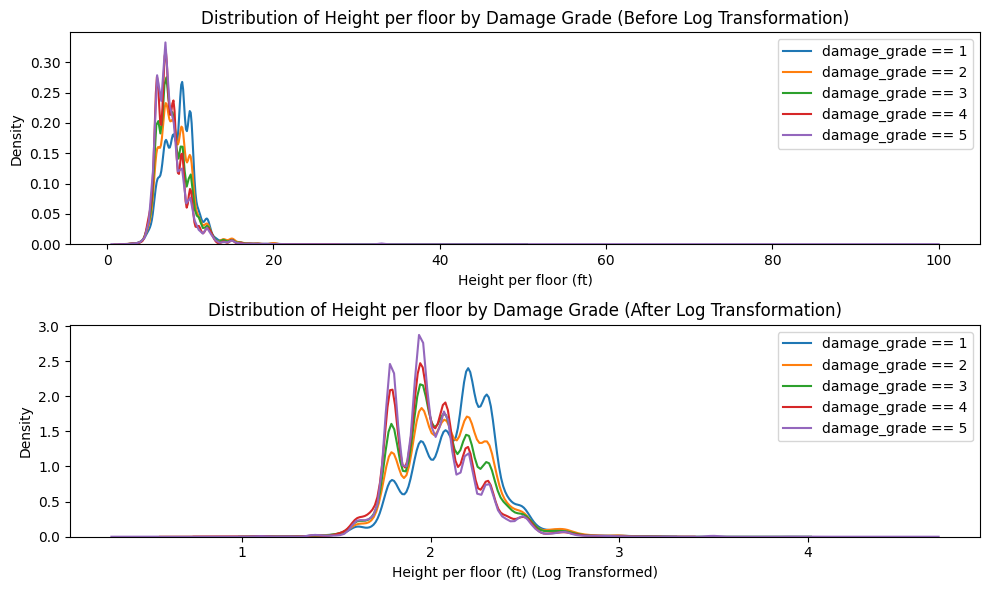

In [131]:
# Plot 1 - Old Building
train["old_building"] = train["old_building"].astype('float64')
test["old_building"] = test["old_building"].astype('float64')
plot_kde_and_log_transform(train, test, 'old_building', 'Old Building', 'Old Building')


# Plot 2 - Plinth Area
train["plinth_area (ft^2)"] = train["plinth_area (ft^2)"].astype('float64')
test["plinth_area (ft^2)"] = test["plinth_area (ft^2)"].astype('float64')
plot_kde_and_log_transform(train, test, 'plinth_area (ft^2)', 'Plinth Area (ft^2)', 'Plinth Area')

# Plot 3 - Height before eq
train["height_before_eq (ft)"] = train["height_before_eq (ft)"].astype('float64')
test["height_before_eq (ft)"] = test["height_before_eq (ft)"].astype('float64')
plot_kde_and_log_transform(train, test, 'height_before_eq (ft)', 'Height before eq (ft)', 'Height before eq')


# Plot 4 - Height per floor
train["height_per_floor"] = train["height_per_floor"].astype('float64')
test["height_per_floor"] = test["height_per_floor"].astype('float64')
plot_kde_and_log_transform(train, test, 'height_per_floor', 'Height per floor (ft)', 'Height per floor')

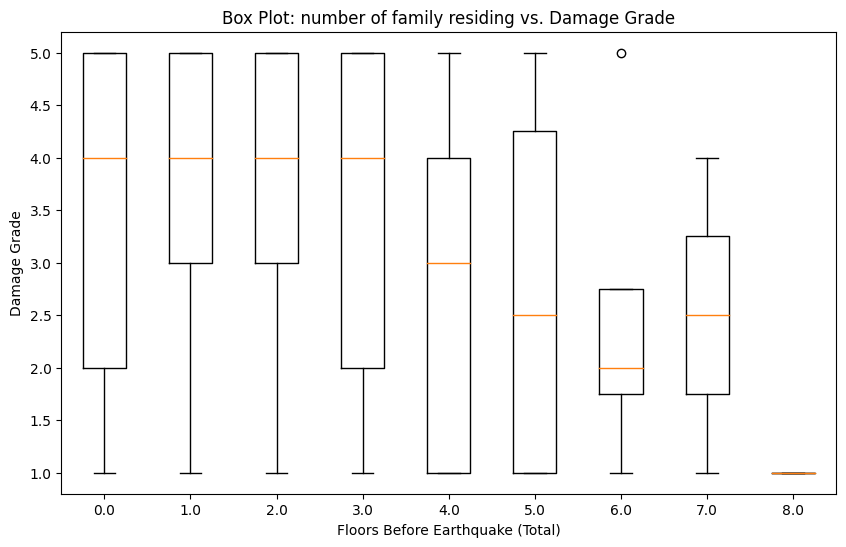

In [132]:
plt.figure(figsize=(10, 6))
plt.boxplot([train[train["no_family_residing"] == i]["damage_grade"] for i in sorted(train["no_family_residing"].unique())],
            labels=sorted(train["no_family_residing"].unique()))
plt.xlabel("Floors Before Earthquake (Total)")
plt.ylabel("Damage Grade")
plt.title("Box Plot: number of family residing vs. Damage Grade")

# Show the plot
plt.show()

In [133]:
excluded_columns = ["old_building", "wall_material", "wall_binding"]
corr = train.drop(excluded_columns, axis=1).corr()
result = corr["damage_grade"].sort_values()
result

type_of_reinforcement_concrete                           -0.299456
height_per_floor                                         -0.178306
family_per_floor                                         -0.120673
plinth_area (ft^2)                                       -0.101007
has_secondary_use                                        -0.091324
no_family_residing                                        0.046817
old_building_divided_by_plinth_area (ft^2)                0.061212
height_before_eq (ft)                                     0.107320
floors_before_eq (total)_divided_by_plinth_area (ft^2)    0.196645
floors_before_eq (total)                                  0.199355
damage_grade                                              1.000000
Name: damage_grade, dtype: float64

In [134]:
columns_to_drop = ["plinth_area (ft^2)", "has_secondary_use", "no_family_residing"]
train = train.drop(columns_to_drop, axis=1)
test = test.drop(columns_to_drop, axis=1)

In [135]:
ordinal_map = {
    "technical_solution_proposed": ['No need','Minor repair','Major repair','Reconstruction']
}

ordinal = [col for col in ordinal_map.keys()]
onehot = [col for col in categorical if col not in ordinal_map.keys()]

onehot.remove("has_secondary_use")

cleanup_nums = {
    "technical_solution_proposed": {"No need": 0,
                                     "Minor repair": 1,
                                     "Major repair": 2,
                                     "Reconstruction": 3}
}
train = train.replace(cleanup_nums)
test = test.replace(cleanup_nums)

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the column using LabelEncoder
train["flexible_superstructure"] = label_encoder.fit_transform(train["flexible_superstructure"])
test["flexible_superstructure"] = label_encoder.transform(test["flexible_superstructure"])

train["govermental_use_type"] = label_encoder.fit_transform(train["govermental_use_type"])
test["govermental_use_type"] = label_encoder.transform(test["govermental_use_type"])

# ohe
train = pd.get_dummies(train, columns=onehot)
test = pd.get_dummies(test, columns=onehot)
y = train["damage_grade"]
train, test = train.align(test, join='inner', axis=1)
train["damage_grade"] = y

print('Training shape: ', train.shape)
print('Testing shape: ', test.shape)

Training shape:  (46801, 100)
Testing shape:  (242082, 99)


In [91]:
# Gets the categorical and numerical columns
categorical = [c for c in train.columns 
               if train.dtypes[c] == 'object']

numerical = [c for c in train.columns 
             if train.dtypes[c] != 'object']

corr = train[numerical].corr()

high_corr_pairs = []
thres_pos = 0.8
thres_neg = -0.5

# Assuming 'corr' is a pandas DataFrame containing correlation values
for col in corr:
    # Extract columns with correlations above thres_pos or below thres_neg
    correlated_cols = corr.index[(corr[col] > thres_pos) | (corr[col] < thres_neg)]
    
    for correlated_col in correlated_cols:
        if correlated_col != col:
            correlation_value = corr.at[col, correlated_col]  # Access correlation value directly from the DataFrame
            high_corr_pairs.append((col, correlated_col, correlation_value))

# Separate positive and negative correlation pairs
pairs_pos, pairs_neg = [], []
unique_pairs = set()

for pair in high_corr_pairs:
    col, ccol, correlation_value = pair
    inverse_pair = (ccol, col, correlation_value)
    
    # Check for uniqueness to avoid duplicates
    if pair not in unique_pairs and inverse_pair not in unique_pairs:
        unique_pairs.add(pair)
        
        # Categorize pairs into positive and negative correlations
        if correlation_value > 0:
            pairs_pos.append(pair)
        else:
            pairs_neg.append(pair)

pairs = pairs_pos + pairs_neg     
print(f"Pair Numerical Columns Highest and Lowest Correlations (treshold is {thres_pos} and {thres_neg})\n")   
for pair in pairs:
    col, ccol, correlation_value = pair
    print(f'{col:<50} {ccol:<50} {correlation_value:.3f}')


Pair Numerical Columns Highest and Lowest Correlations (treshold is 0.8 and -0.5)

technical_solution_proposed                        damage_grade                                       0.900
wall_binding_0                                     wall_material_0                                    0.837
wall_binding_2                                     wall_material_1                                    0.821
wall_binding_5                                     wall_material_2                                    0.852
floors_before_eq (total)                           family_per_floor                                   -0.546
floors_before_eq (total)                           type_of_other_floor_Not applicable                 -0.721
height_before_eq (ft)                              type_of_other_floor_Not applicable                 -0.660
land_surface_condition_Flat                        land_surface_condition_Moderate slope              -0.883
type_of_foundation_Clay Sand Mixed mortar-Stone/B

In [136]:
print("Correlations with Target Column\n")

thres_pos = 0.2
thres_neg = -0.2

neg, neut, pos = [], [], []
for i in range(len(corr['damage_grade'])):
    cor = corr['damage_grade'][i]
    if cor > thres_pos:
        pos.append([cor, corr['damage_grade'].index[i]])
    elif cor < thres_neg:
        neg.append([cor, corr['damage_grade'].index[i]])
    else:
        neut.append([cor, corr['damage_grade'].index[i]])

print(f"Positive Correlations (treshold is {thres_pos})")
for cor in pos:
    score, col = cor
    if col == 'damage_grade': continue
    print(f'{col:<50}: {score:.3f}')

print(f"\nNegative Correlations (treshold is {thres_neg})")
for cor in neg:
    score, col = cor
    print(f'{col:<50}: {score:.3f}')

Correlations with Target Column

Positive Correlations (treshold is 0.2)

Negative Correlations (treshold is -0.2)
type_of_reinforcement_concrete                    : -0.299


In [137]:
train.to_csv("Dataset/train_log_fe_fillna_lessrow_lessunique_le_ohe.csv", index=False)
test.to_csv("Dataset/test_log_fe_fillna_lessrow_lessunique_le_ohe.csv", index=False)